In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter


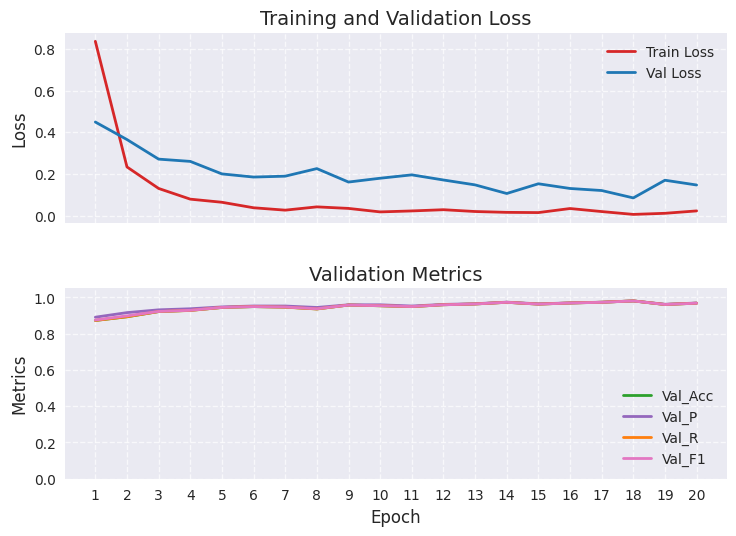

In [8]:
data = pd.read_csv('/home/i.karakulin/Classification-of-the-Simpsons/meta_data/metrics.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

x_ticks = np.arange(1, len(data)+1)

ax1.plot(x_ticks, data['Train_Loss'], label='Train Loss', color='tab:red', linewidth=2)
ax1.plot(x_ticks, data['Val_Loss'], label='Val Loss', color='tab:blue', linewidth=2)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title('Training and Validation Loss', fontsize=14)

metrics = ['Val_Acc', 'Val_P', 'Val_R', 'Val_F1']
colors = ['tab:green', 'tab:purple', 'tab:orange', 'tab:pink']
for metric, color in zip(metrics, colors):
    ax2.plot(x_ticks, data[metric], label=metric, color=color, linewidth=2)

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_xticks(np.arange(1, 21, 1)) 
ax2.set_xticklabels(np.arange(1, 21, 1)) 

ax2.set_ylabel('Metrics', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_title('Validation Metrics', fontsize=14)
ax2.set_ylim(0, 1.05)

plt.tight_layout(pad=3.0)
plt.savefig('metrics_on_val_and_train.png', dpi=300, bbox_inches='tight')
plt.show()


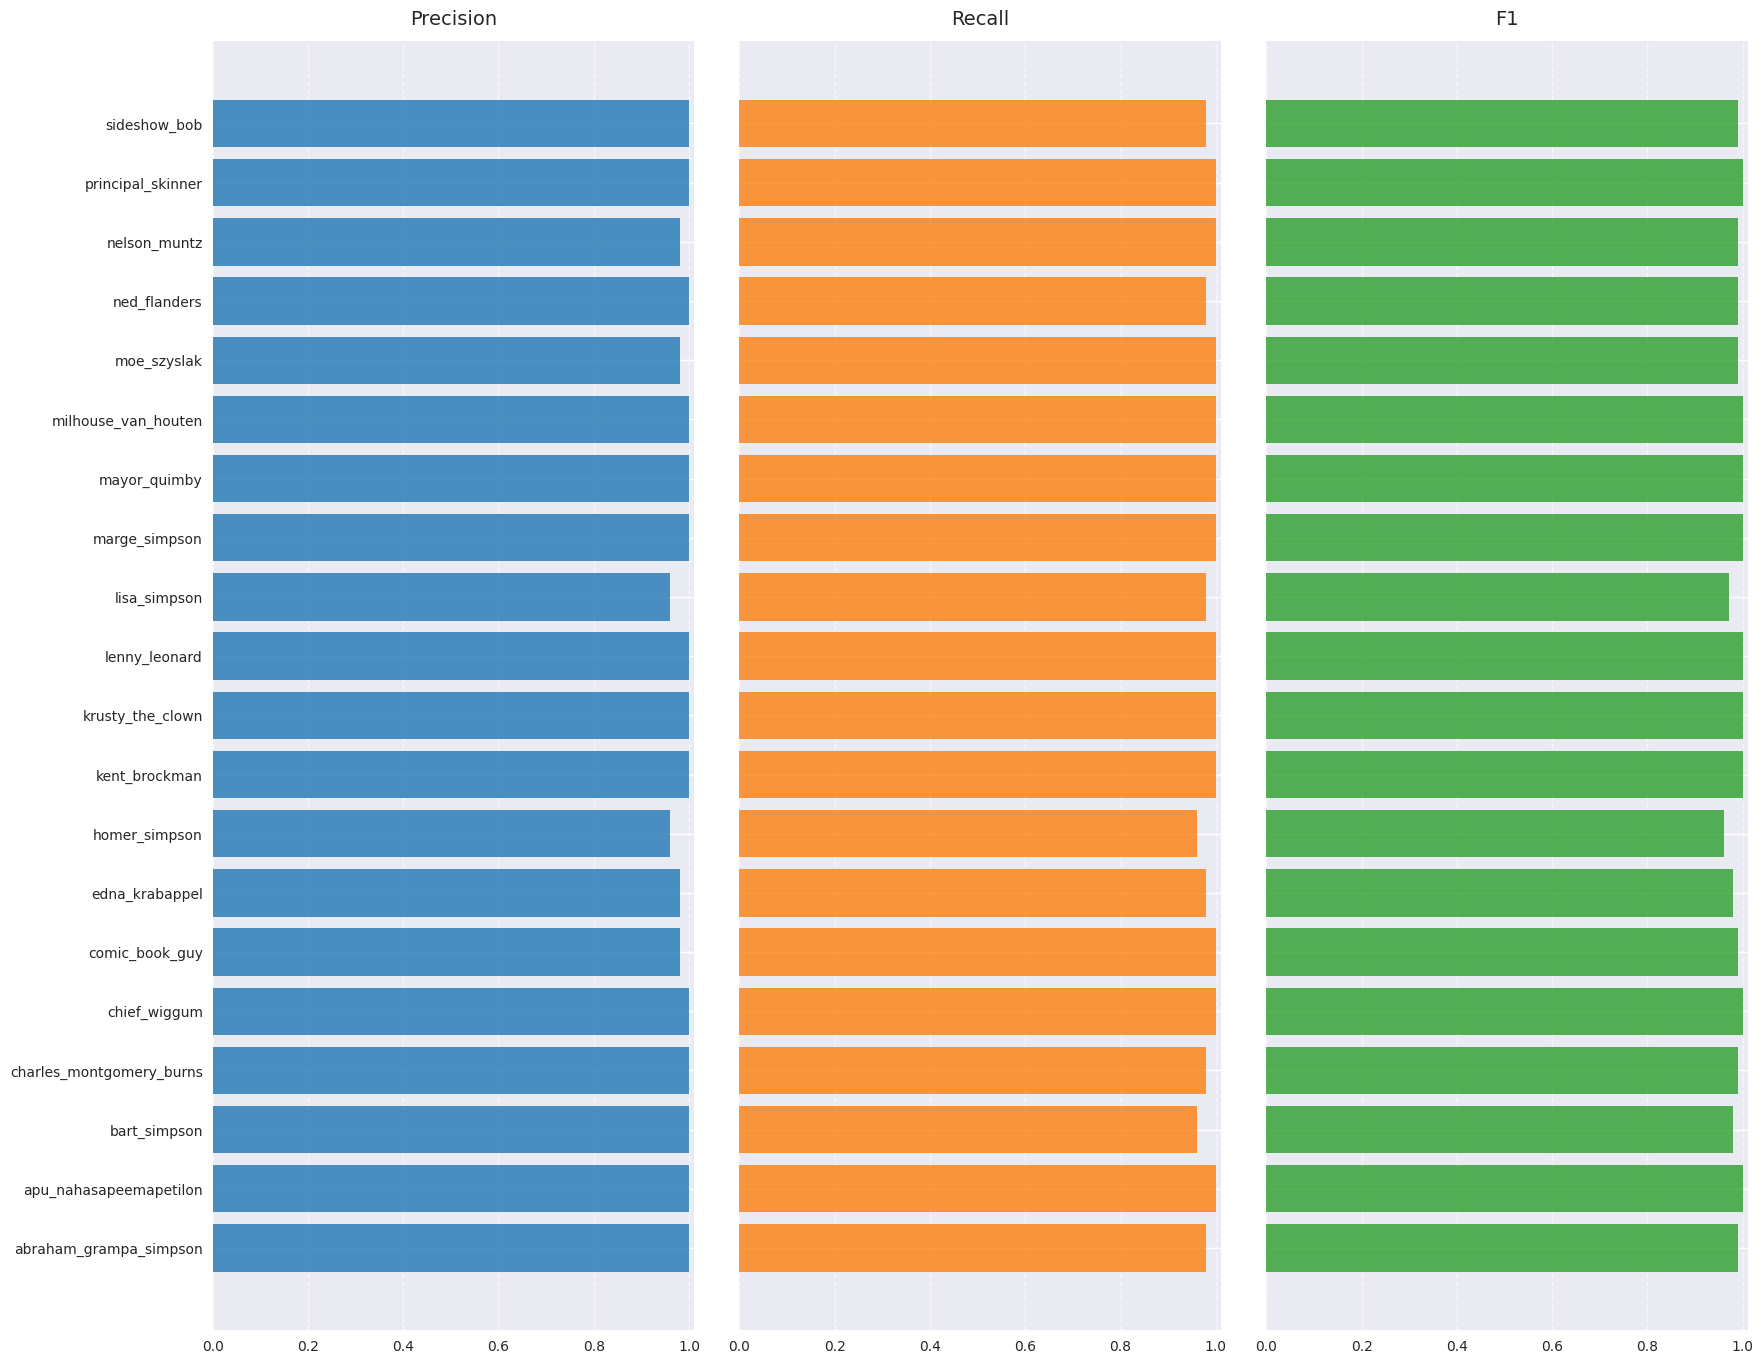

In [6]:
df = pd.read_csv('../meta_data/test_metric.csv')
df['Class'] = df['Class'].astype(str)

plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, axes = plt.subplots(1, 3, figsize=(18, 14))

for i, (ax, metric, color) in enumerate(zip(axes, ['Precision', 'Recall', 'F1'], colors)):
    bars = ax.barh(df['Class'], df[metric], color=color, alpha=0.8, height=0.8)
    
    ax.set_xlim(0, 1.01)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_title(metric, fontsize=14, pad=12)
    
    if i == 0:
        ax.tick_params(axis='y', labelsize=10)
    else:
        ax.tick_params(axis='y', labelleft=False)

plt.tight_layout(pad=2.0)
plt.savefig('metrics_on_test.png', dpi=300, bbox_inches='tight')
plt.show()